### Análise de Mídia Social da Hashtag Winx no Twitter
##### Este trabalho analisa a rede social Twitter utilizando sua API e as hashtags 'winxs' e 'netflix', a fim de levantar o impacto que a Empresa Netflix tem no país e no mundo em relação ao anúncio de uma nova produção em cartaz. É pretendido analisar questões como críticas, público-alvo desta produção e grupo de pessoas que estão comentando sobre a produção no período de XX/12/2020 a XX/12/2020.

## Questões de Pesquisa
1) Quanto tempo levou para a #winx alcançar 1.000 tweets nas contas da @netflix e @NetflixBrasil?

2) Durante o primeiro dia, em suma, sobre o que os tweets falavam da #winx? Quais foram as palavras que mais apareceram?

3) Quais outras hashtags apareceram em conjunto da #winx durante o primeiro dia?

4) Tratando-se de polaridade, quais são os tweets que apresentam polaridades mais positivas?

5) Em relação à polaridade, quais são os tweets que apresentam polaridades mais negativas?

6) Qual a média de sentimento dos tweets que contam com a #winx?

7) Quais outras hashtags podem ser encontradas nos tweets que falam sobre #winx?

8) Quais são os retweets mais populares que falam sobre #winx?

### Importações de bibliotecas

In [10]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

### Definição das figuras

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

### Configuração das credenciais da API do Twitter

In [3]:
config = pd.read_csv("../keys twitter.csv", sep=";")
twitterApiKey = config['twitterApiKey'][0]
twitterApiSecret = config['twitterApiSecret'][0]
twitterApiAccessToken = config['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret = config['twitterApiAccessTokenSecret'][0]

### Autenticação

In [4]:
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
twetterApi = tweepy.API(auth, wait_on_rate_limit = True)

### Conta(s) em foco

In [5]:
account1 = "netflix"
account2 = "NetflixBrasil"

In [6]:
tweets1 = tweepy.Cursor(twetterApi.user_timeline, 
                        screen_name=account1, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        contributor_details=False,
                        include_entities=False
                        ).items(200);

tweets2 = tweepy.Cursor(twetterApi.user_timeline, 
                        screen_name=account2, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        contributor_details=False,
                        include_entities=False
                        ).items(200);

In [7]:
#Account1
df1 = pd.DataFrame(data=[tweet.text for tweet in tweets1], columns=['Tweet'])

#Account2
df2 = pd.DataFrame(data=[tweet.text for tweet in tweets2], columns=['Tweet'])


In [8]:
pd.set_option('display.max_colwidth', 240)

print('Netflix')
df1.head()

Netflix


,Tweet
0,Tiny Pretty Things cast trained dancers in lead roles resulting in some seriously sensational routines — like this… https://t.co/RNvetecDDM
1,"RT @Most: Zazz aside, at the center of Ryan Murphy’s THE PROM lies a true story that's just as fantastical as the movie. Meet the inspirati…"
2,"After all these years, it is still thrilling to watch Meryl Streep just absolutely crush a monologue. \n\n(📽️: The Pr… https://t.co/AcbIsKz3Mr"
3,RT @NetflixIsAJoke: https://t.co/b1Fk4x7Fjx
4,RT @NetflixFilm: These cutie pies were at the top of the Instagram charts — and our hearts! — in 2020. They got the most new followers of a…


In [9]:
print('Netflix Brasil')
df2.head()

Netflix Brasil


,Tweet
0,"Ok, vamos lá: thread com os melhores trocadilhos com o título O Gambito da Rainha."
1,Pera aí ✋🤔🐝 https://t.co/lvQkll4OZ6
2,"Vinte e um estudantes desaparecem misteriosamente. Vinte anos depois, a verdade perturbadora sobre o caso vem à ton… https://t.co/jeQH0WElFK"
3,The boss is on / ¡La Patroa está on! / A patroa está ON!\nAnitta: Made In Honório já está disponível.… https://t.co/0KZuo4D0q4
4,"RT @Anitta: My new series, Anitta: Made In Honório, is now available on @netflix / @NetflixBrasil for you to binge-watch!\n\nMi nueva serie,…"


### Funções de Subjetividade e Polaridade

In [12]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [15]:
# Aplicando funções nos dataframes

df1['Subjectivity'] = df1['Tweet'].apply(getTextSubjectivity)
df1['Polarity'] = df1['Tweet'].apply(getTextPolarity)

df2['Subjectivity'] = df2['Tweet'].apply(getTextSubjectivity)
df2['Polarity'] = df2['Tweet'].apply(getTextPolarity)


In [18]:
# Função para categorizar Tweets em Positivos, Negativos e Neutros.
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [19]:
# Aplicando função de categorização nos dataframes
df1['Score'] = df1['Polarity'].apply(getTextAnalysis)

df2['Score'] = df2['Polarity'].apply(getTextAnalysis)

In [20]:
df1.head()

,Tweet,Subjectivity,Polarity,Score
0,Tiny Pretty Things cast trained dancers in lead roles resulting in some seriously sensational routines — like this… https://t.co/RNvetecDDM,0.722222,0.305556,Positive
1,"RT @Most: Zazz aside, at the center of Ryan Murphy’s THE PROM lies a true story that's just as fantastical as the movie. Meet the inspirati…",0.416667,0.250000,Positive
2,"After all these years, it is still thrilling to watch Meryl Streep just absolutely crush a monologue. \n\n(📽️: The Pr… https://t.co/AcbIsKz3Mr",0.950000,0.225000,Positive
3,RT @NetflixIsAJoke: https://t.co/b1Fk4x7Fjx,0.000000,0.000000,Neutral
4,RT @NetflixFilm: These cutie pies were at the top of the Instagram charts — and our hearts! — in 2020. They got the most new followers of a…,0.484848,0.420455,Positive


In [21]:
df2.head()

,Tweet,Subjectivity,Polarity,Score
0,"Ok, vamos lá: thread com os melhores trocadilhos com o título O Gambito da Rainha.",0.500000,0.500000,Positive
1,Pera aí ✋🤔🐝 https://t.co/lvQkll4OZ6,0.000000,0.000000,Neutral
2,"Vinte e um estudantes desaparecem misteriosamente. Vinte anos depois, a verdade perturbadora sobre o caso vem à ton… https://t.co/jeQH0WElFK",0.000000,0.000000,Neutral
3,The boss is on / ¡La Patroa está on! / A patroa está ON!\nAnitta: Made In Honório já está disponível.… https://t.co/0KZuo4D0q4,0.000000,0.000000,Neutral
4,"RT @Anitta: My new series, Anitta: Made In Honório, is now available on @netflix / @NetflixBrasil for you to binge-watch!\n\nMi nueva serie,…",0.427273,0.318182,Positive


### Limpeza de dados

In [24]:
# Cleaning the tweets

def limparTweet(txt):
    # Remove mentions
    # txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    # txt = re.sub(r'#', '', txt)
    # Remove retweets:
     txt = re.sub(r'RT : ', '', txt)
    # Remove urls
     txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
     return txt

In [25]:
df1['Tweet'] = df1['Tweet'].apply(limparTweet)

df2['Tweet'] = df2['Tweet'].apply(limparTweet)


### Removendo linhas vazias 

In [ ]:
df1 = df1.drop(df1[df1['Tweet'] == ''].index)

df2 = df2.drop(df2[df2['Tweet'] == ''].index)


### Análise de Dados

#### 1) Quanto tempo levou para a #winx alcançar 1.000 tweets nas contas da @netflix e @NetflixBrasil?

#### 2) Durante o primeiro dia, em suma, sobre o que os tweets falavam da #winx? Quais foram as palavras que mais apareceram?

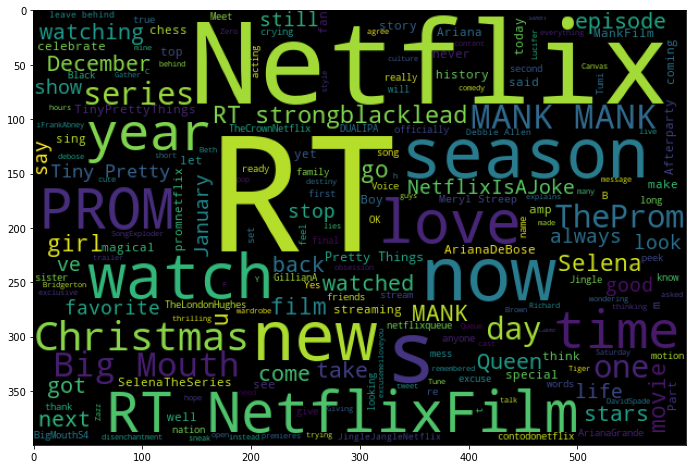

In [27]:
# Creating a word cloud

words = ' '.join([tweet for tweet in df1['Tweet']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()

#### 3) Quais outras hashtags apareceram em conjunto da #winx durante o primeiro dia?

#### 4) Tratando-se de polaridade, quais são os tweets que apresentam polaridades mais positivas?

#### 5) Em relação à polaridade, quais são os tweets que apresentam polaridades mais negativas?

#### 6) Qual a média de sentimento dos tweets que contam com a #winx?

#### 7) Quais outras hashtags podem ser encontradas nos tweets que falam sobre #winx?

#### 8) Quais são os retweets mais populares que falam sobre #winx?